# EX 4

Implement programs for estimating & eliminating trend in time series data- aggregation, smoothing.

 Step 1: Load & Visualize Time Series Data

            IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151


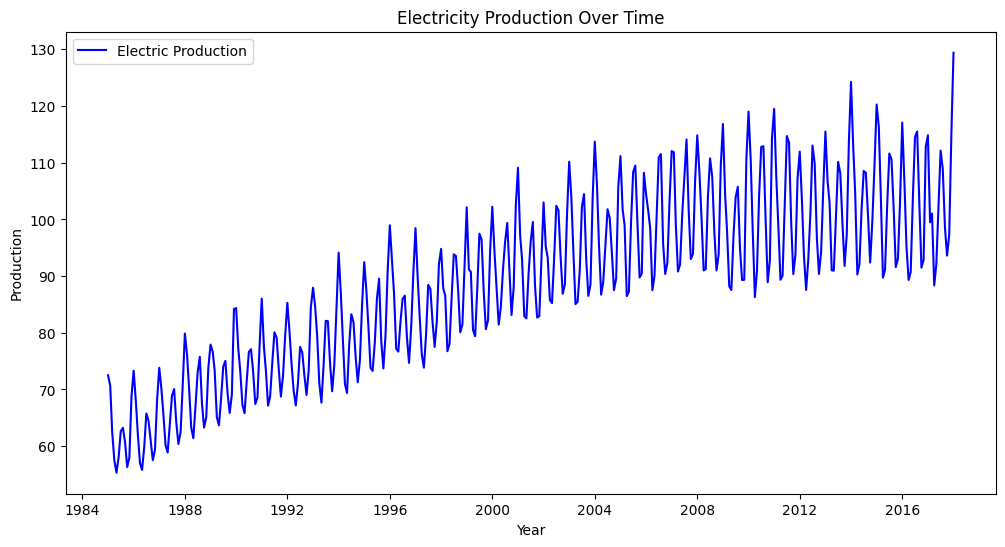

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
df = pd.read_csv("/content/Electric_Production (1).csv", parse_dates=['DATE'], index_col='DATE')

# Rename column for clarity
df.rename(columns={'Value': 'Electric_Production'}, inplace=True)

# Display first few rows
print(df.head())

# Plot original time series
plt.figure(figsize=(12,6))
plt.plot(df['IPG2211A2N'], label="Electric Production", color='blue')
plt.title("Electricity Production Over Time")
plt.xlabel("Year")
plt.ylabel("Production")
plt.legend()
plt.show()


Step 2: Estimate Trend Using Decomposition

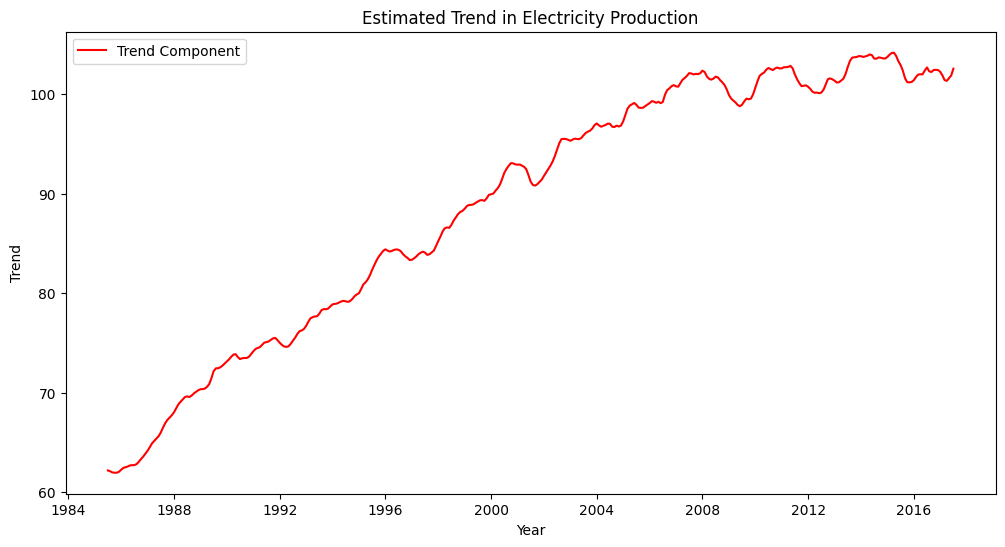

In [ ]:
# Decompose time series (Additive Model)
decomposition = seasonal_decompose(df['IPG2211A2N'], model='additive', period=12)

# Extract trend component
trend = decomposition.trend

# Plot trend
plt.figure(figsize=(12,6))
plt.plot(trend, label="Trend Component", color='red')
plt.title("Estimated Trend in Electricity Production")
plt.xlabel("Year")
plt.ylabel("Trend")
plt.legend()
plt.show()


 Step 3: Eliminate Trend Using Aggregation

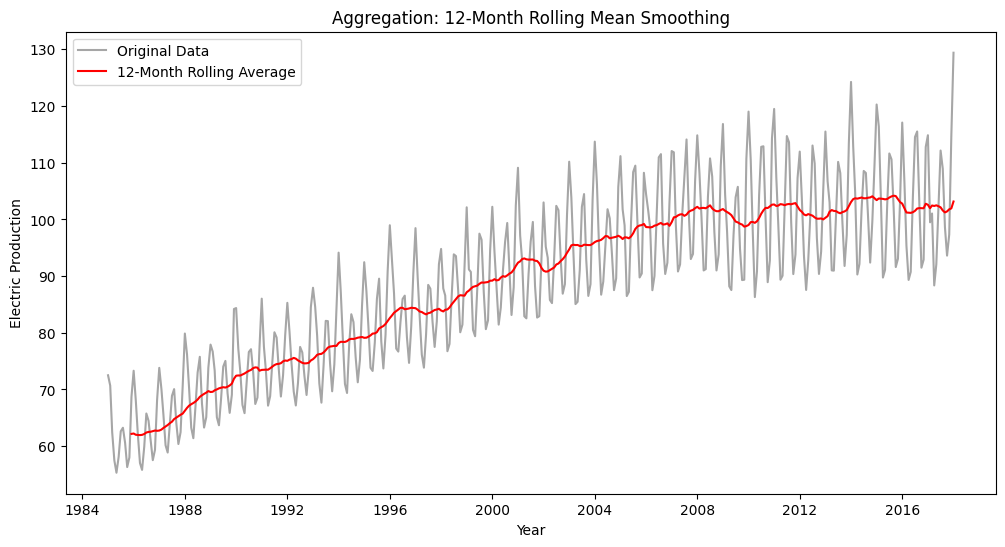

In [ ]:
# Apply monthly rolling average (12 months)
df['Rolling_Mean_12'] = df['IPG2211A2N'].rolling(window=12).mean()

# Plot original vs aggregated data
plt.figure(figsize=(12,6))
plt.plot(df['IPG2211A2N'], label="Original Data", color='gray', alpha=0.7)
plt.plot(df['Rolling_Mean_12'], label="12-Month Rolling Average", color='red')
plt.title("Aggregation: 12-Month Rolling Mean Smoothing")
plt.xlabel("Year")
plt.ylabel("Electric Production")
plt.legend()
plt.show()


 Step 4: Eliminate Trend Using Differencing

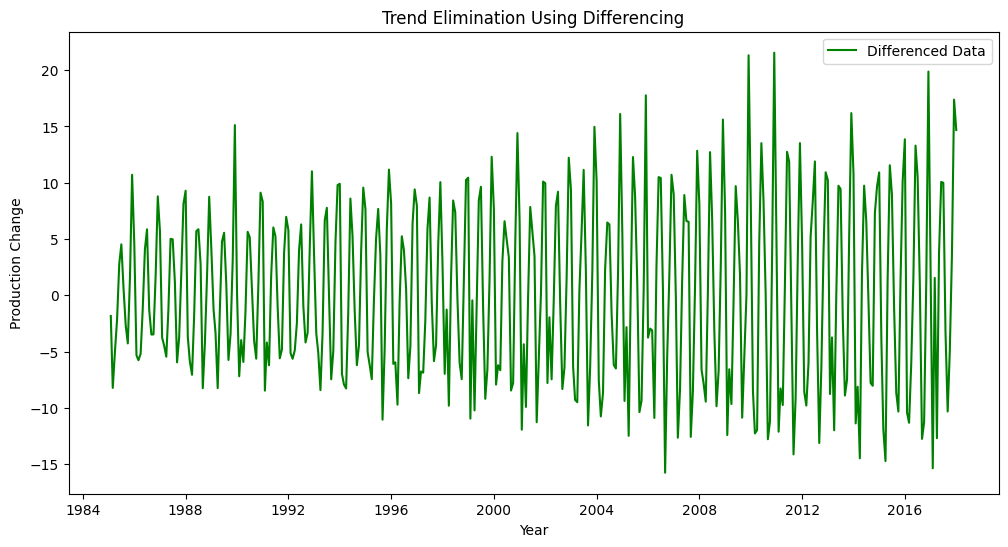

In [ ]:
# First-order differencing
df['Differenced'] = df['IPG2211A2N'].diff()

# Plot differenced data
plt.figure(figsize=(12,6))
plt.plot(df['Differenced'], label="Differenced Data", color='green')
plt.title("Trend Elimination Using Differencing")
plt.xlabel("Year")
plt.ylabel("Production Change")
plt.legend()
plt.show()


Step 5: Validate Trend Removal

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF test on differenced data
adf_test = adfuller(df['Differenced'].dropna())

# print(f"🔹 ADF Statistic: {adf_test[0]:.4f}")
# print(f"🔹 p-value: {adf_test[1]:.4f}")
if adf_test[1] < 0.05:
    print(" Trend Removed: The data is now stationary!")
else:
    print("Trend Not Fully Removed: Further processing needed.")


 Trend Removed: The data is now stationary!
